In [36]:

개별 가정 전력 소비 데이터 세트

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

C:\Users\82105\AppData\Local\Temp\ipykernel_23216\2022684591.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_table('household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
import pandas as pd

df= pd.read_table('household_power_consumption.txt', sep=';')
df

## 컬럼별 설명 

- 1.date: dd/mm/yyyy 형식의 날짜
- 2.time: hh:mm:ss 형식의 시간
- 3.global_active_power: 가정용 전 세계 분 평균 유효 전력(킬로와트)
- 4.global_reactive_power: 가정용 전 세계 분 평균 무효 전력 (단위: 킬로와트)
- 5.전압: 분 평균 전압(단위: 볼트)
- 6.global_intensity: 가정용 글로벌 분 평균 전류 강도(단위: 암페어)
- 7.sub_metering_1: 에너지 보조 계량 1번(활성 에너지의 와트시 단위) ). 주로 식기세척기, 오븐, 전자레인지(핫 플레이트는 전기가 아닌 가스로 작동됨)가 있는 주방에 해당합니다.
- 8.sub_metering_2: 에너지 보조 계량 2번(활성 에너지의 와트시 단위). 세탁기, 회전식 건조기, 냉장고, 조명이 있는 세탁실에 해당합니다.
- 9.sub_metering_3: 에너지 보조 계량 3번(활성 에너지의 와트시 단위). 전기 온수기 및 에어컨에 해당합니다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 156.3+ MB


## 결측지 제거 

In [42]:
df=df.dropna()
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
month                    0
dtype: int64

## 순서가 0,1인  컬럼을 제외한 나머지 컬럼들을 실수로 변환

In [43]:
df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]=df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].astype(float)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   month                  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 172.0+ MB


In [18]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


#####  직관적으로 해석하자면, 'pandas 의 datetime으로 바꿔주는 함수' 가 되겠네요.

##### 이렇게 datetime 형태로 바꿔주고,

- import pandas as pd
- pd.to_datetime(data['date'])
 

##### .dt와 원하는 정보(year, month 등)를 입력하면 됩니다.

- data['year'] = data['date'].dt.year #연도
- data['month'] = data['date'].dt.month #월
- data['day'] = data['date'].dt.day #일
- data['dayofweek'] = data['date'].dt.dayofweek #요일 (월 = 0)

In [45]:
import datetime as dt
import pandas as pd
df['Date']=pd.to_datetime(df['Date'])

### 시간대 별로 돌릴려고 하니 데이터가 너무 방대하기 때문에 월별로 묶었습니다

In [46]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year 
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month,year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006


In [47]:
df_goup=df.groupby(['year', 'month']).sum()
df_goup.head()

Global_active_power  Global_reactive_power      Voltage  \
year month                                                            
2006 12               41813.282               2889.436   5309773.22   
2007 1                63795.714               5559.936  10714523.25   
     2                46563.028               4632.204   9671130.63   
     3                55277.564               5127.232  10711059.86   
     4                38641.408               4788.536   9421339.38   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
year month                                                                    
2006 12             176594.8         27460.0         48712.0        162951.0  
2007 1              270547.6         72455.0         66382.0        323102.0  
     2              197378.8         35733.0         65508.0        232883.0  
     3              234476.0         58307.0         87919.0        280266.0  
     4              166258.6         45958.0         53811.0        194004.0

## 군집화 전 칼럼별 히스토그램 확인하기


(array([ 1.,  0.,  1.,  3.,  7., 11., 13.,  4.,  7.,  2.]),
 array([ 71463.6,  91372. , 111280.4, 131188.8, 151097.2, 171005.6,
        190914. , 210822.4, 230730.8, 250639.2, 270547.6]),
 <BarContainer object of 10 artists>)

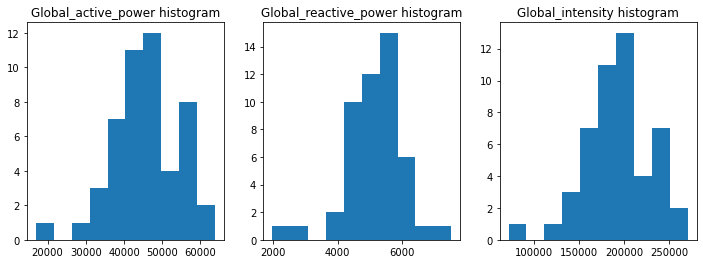

In [50]:
# 한쪽으로 쏠린 데이터를 히스토그램화 하면 알수있는 현상을 알아보자
from matplotlib import pyplot as plt
%matplotlib inline
fig , (ax1, ax2, ax3) = plt.subplots(figsize = (12,4),nrows=1, ncols = 3)
ax1.set_title('Global_active_power histogram')
ax1.hist(df_goup['Global_active_power'])

ax2.set_title('Global_reactive_power histogram')
ax2.hist(df_goup['Global_reactive_power'])

ax3.set_title('Global_intensity histogram')
ax3.hist(df_goup['Global_intensity'])

In [51]:
df_goup[['Global_active_power','Global_reactive_power','Global_intensity']].describe()


,Global_active_power,Global_reactive_power,Global_intensity
count,49.000000,49.000000,49.000000
mean,45653.568612,5173.991878,193542.338776
std,9090.398240,896.790700,37580.142218
min,16936.790000,1980.296000,71463.600000
25%,40544.308000,4705.956000,174130.600000
50%,45862.270000,5268.454000,194853.400000
75%,50629.872000,5668.664000,213882.800000
max,63795.714000,7507.118000,270547.600000


### ### standartScaler로 평균과 표준편차를 재조정한 뒤에 k-means를 수행해보자.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
X_features = df_goup[['Global_active_power','Global_reactive_power','Global_intensity']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans =KMeans(n_clusters=3, random_state=0)
labels =kmeans.fit_predict(X_features_scaled)
df_goup['cluster_label'] =labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

 ### 군집회를 3개로 진행시켜보니(n_clusters =3) 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 0.592로 안정적인 수치가 나왔습니다.
 ### 0.5이상이면 좋다

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


실루엣 스코어는 : 0.355


### 실루엣 계수 시각화 함수

In [56]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


### 군집갯수별 시각화 함수

In [59]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

## 함수들을 이용해 실루엣 계수, 군집별 갯수 시각화
 - ## LOG1P()를 하기 전인 데이터로 실루엣 계수, 군집별 갯수시각화

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

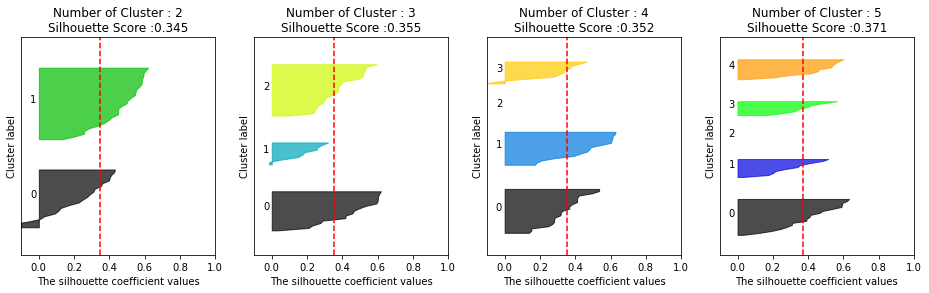

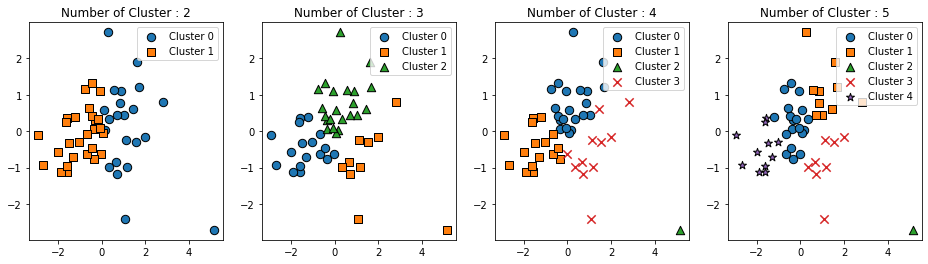

In [60]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

## 데이터에 LOG1P()를 적용 후  실루엣 계수, 군집별 갯수시각화
### 데이터 왜곡의 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(LOG)를 적용는 로그변환입니다.
- #### 데이터셋의 왜곡 정도를 낮추기 위해 전체데이터를 로그 변화하여 K-Means을 적용해 결과를 비교해보자

In [62]:
#'Global_active_power','Global_reactive_power','Global_intensity'컬럼에 np.log1p()로 log transformation
df_goup['Global_active_power_log']= np.log1p(df_goup['Global_active_power'])
df_goup['Global_reactive_power_log']= np.log1p(df_goup['Global_reactive_power'])
df_goup['Global_intensity_log'] = np.log1p(df_goup['Global_intensity'])
'Global_active_power','Global_reactive_power','Global_intensity'

#
X_features = df_goup[['Global_active_power_log','Global_reactive_power_log','Global_intensity_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)


kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

df_goup['cluster_label'] = labels

print('실루엣 계수 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


실루엣 계수 스코어는 : 0.387


##### >>>실루엣 스코어에 대한 결과
- #### LOG1P 실루엣 계수는 조금 높아졌다, 실루엣 스코어의 절대치가 중요한것은 아니다
- #### 어떻게 개별 군집이 더 균일하게 나뉠수 있는지가 더중요하기 때문이다.

### 로그 변환한 데이터를 기반으로 실루엣 계수와 군집화 구성을 시각화 해보자



C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

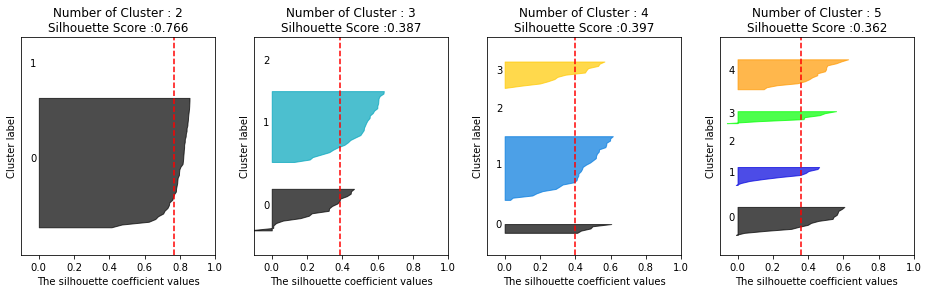

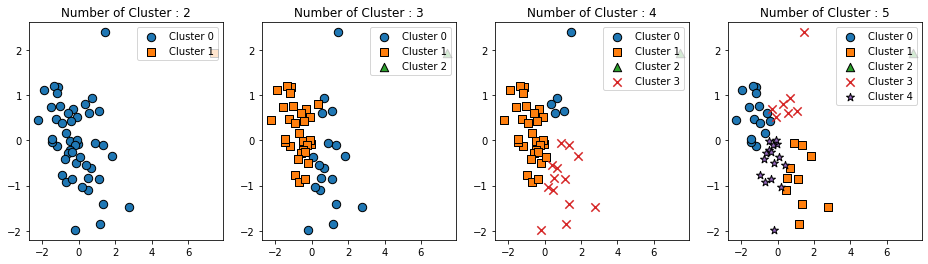

In [63]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)